In [1]:
# Libraries 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy as sp 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
from ydata_profiling import ProfileReport
import itertools
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from fitter import Fitter

# Qualitative Dependent Variable Models

### 1. Briefly discuss your data and economic/finance/business question you are trying to answer with your model.

The above data was adopted from a US health insurance dataset from Kaggle. This specific adaptation can be found at https://www.kaggle.com/code/easonlai/inspiration-on-simple-insurance-dataset/input. Simply, the above data is used to predict whether a health insurance claim was filed (1=yes, 0=no). One example of a potential regressor is the BMI (body mass index). It is natural to assume that as BMI increases, the probability that a health insurance claim is filed will increase on average. Another important consideration is that the models below will likely ignore the categorical variable region because it is extremely difficult to interpret. It is difficult to prove that a region of 2.5 is somewhere between the southeast and southwest, and we do not even know how the regions are defined.

### 2. Provide a descriptive analysis of your variables. This should include histograms and fitted distributions, correlation plot, boxplots, scatterplots, and statistical summaries (e.g., the five-number summary). All figures must include comments.

#### Variable Description

age : age of policyholder

sex: gender of policy holder (female=0, male=1)

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25

steps: average walking steps per day of policyholder

children: number of children / dependents of policyholder

smoker: smoking state of policyholder (non-smoke=0;smoker=1)

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)

charges: individual medical costs billed by health insurance

insuranceclaim: yes=1, no=0

In [2]:
df=pd.read_csv('Hinsurance.csv')
df.head()

age  sex     bmi  steps  children  smoker  region      charges  \
0   19    0  27.900   3009         0       1       3  16884.92400   
1   18    1  33.770   3008         1       0       2   1725.55230   
2   28    1  33.000   3009         3       0       2   4449.46200   
3   33    1  22.705  10009         0       0       1  21984.47061   
4   32    1  28.880   8010         0       0       1   3866.85520   

   insuranceclaim  
0               1  
1               1  
2               0  
3               0  
4               1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [4]:
df.describe()

age          sex          bmi         steps     children  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397   5328.623318     1.094918   
std      14.049960     0.500160     6.098187   2453.643236     1.205493   
min      18.000000     0.000000    15.960000   3000.000000     0.000000   
25%      27.000000     0.000000    26.296250   3008.000000     0.000000   
50%      39.000000     1.000000    30.400000   4007.000000     1.000000   
75%      51.000000     1.000000    34.693750   8004.000000     2.000000   
max      64.000000     1.000000    53.130000  10010.000000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1338.000000  1338.000000   1338.000000     1338.000000  
mean      0.204783     1.515695  13270.422265        0.585202  
std       0.403694     1.104885  12110.011237        0.492871  
min       0.000000     0.000000   1121.873900        0.000000  
25%       0.000000     1.000000   4740.287150        0.000000  
50%       0.000000     2.000000   9382.033000        1.000000  
75%       0.000000     2.000000  16639.912515        1.000000  
max       1.000000     3.000000  63770.428010        1.000000

Here are the summary statistics for our data. In here we find the various quartile values, mean and std of our variables as well as their max and min values. 

In [5]:
df.isna().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

There are zero N/As. 

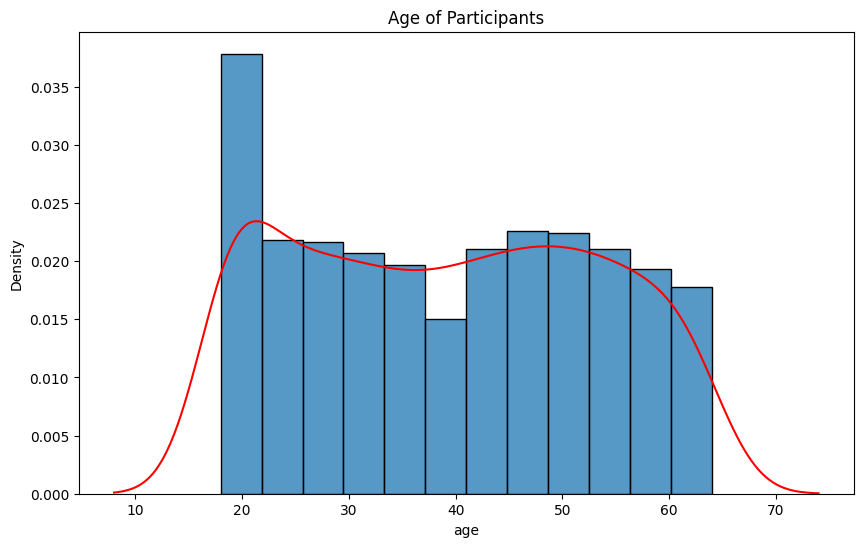

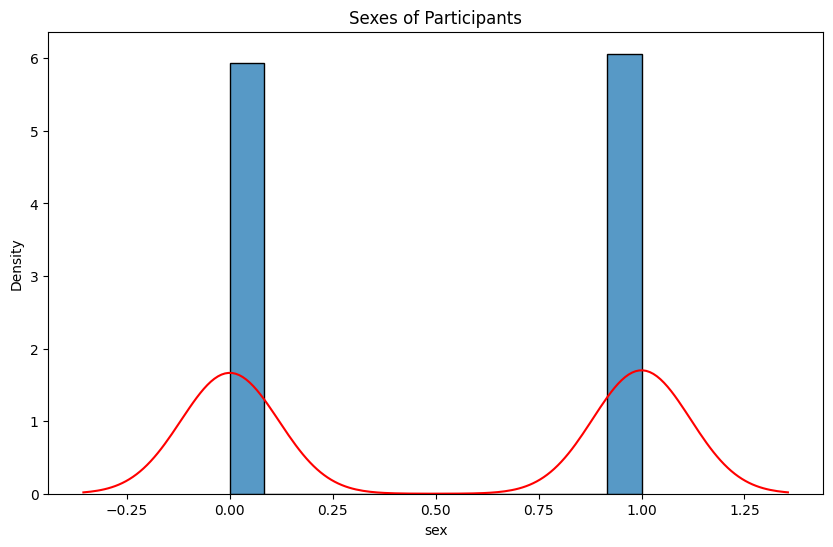

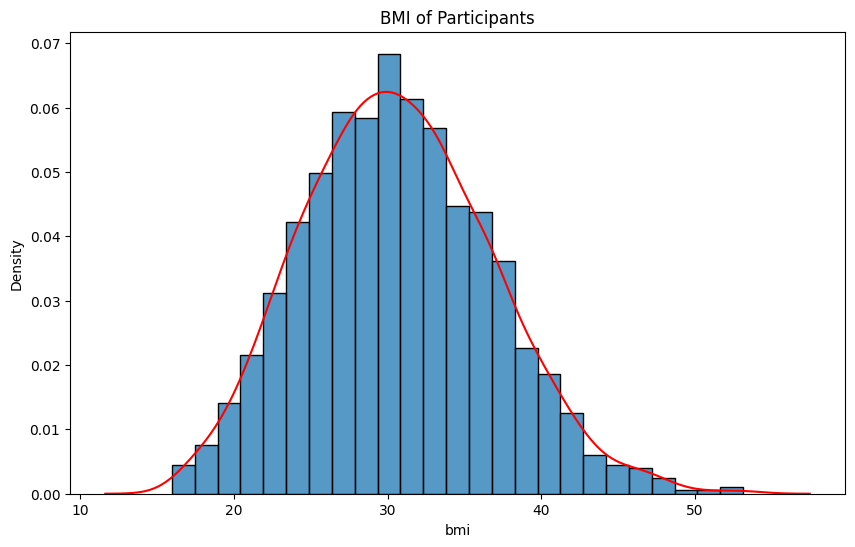

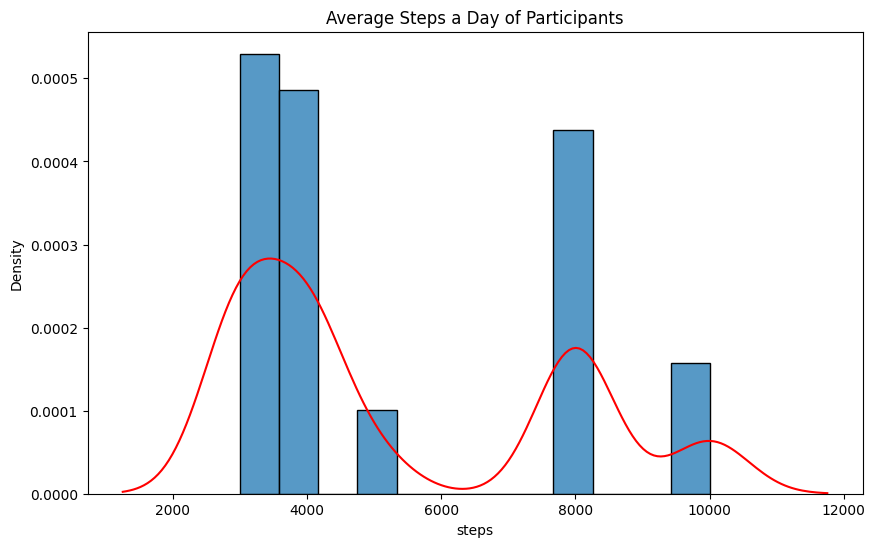

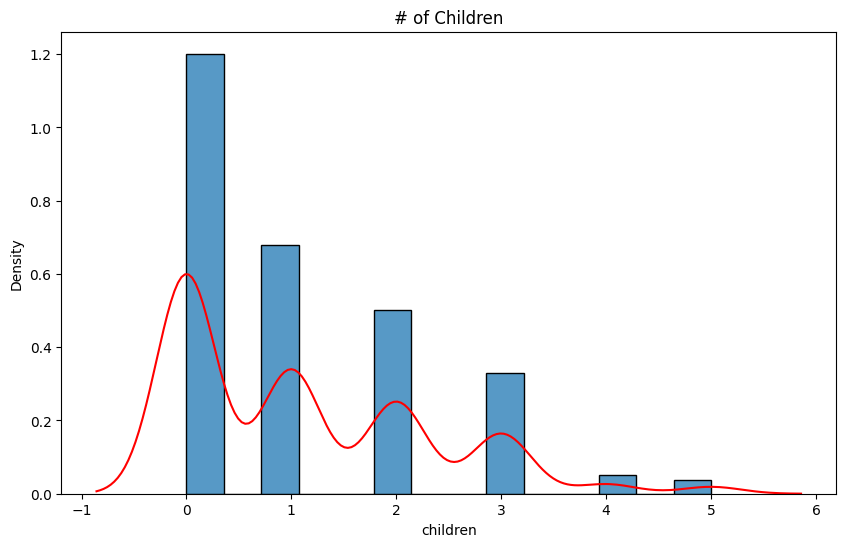

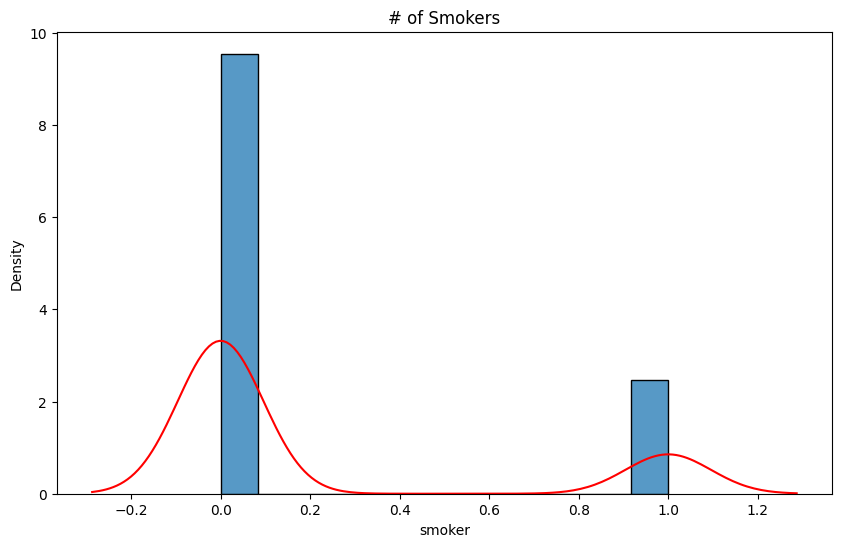

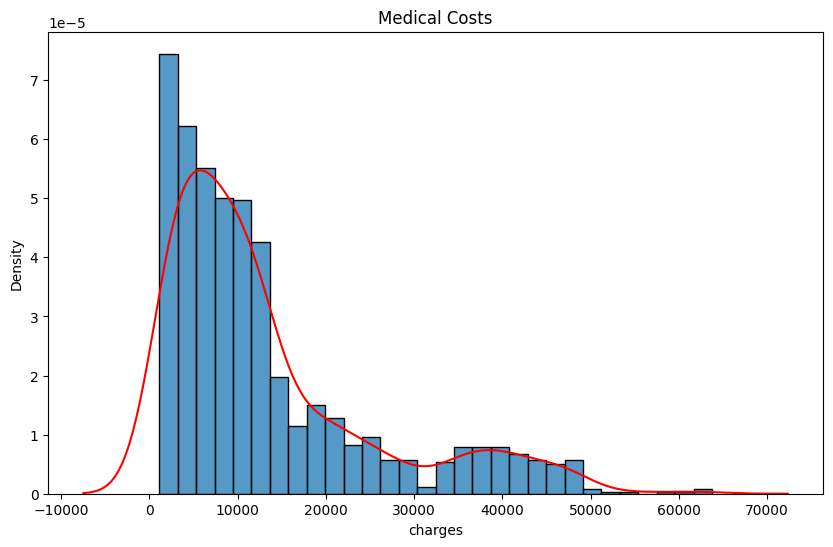

In [6]:
# Histograms and Density plots

plt.figure(figsize = (10,6))
sns.histplot(df.age, stat = "density")
sns.kdeplot(df.age, color = "red")
plt.title("Age of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.sex, stat = "density")
sns.kdeplot(df.sex, color = "red")
plt.title("Sexes of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.bmi, stat = "density")
sns.kdeplot(df.bmi, color = "red")
plt.title("BMI of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.steps, stat = "density")
sns.kdeplot(df.steps, color = "red")
plt.title("Average Steps a Day of Participants")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.children, stat = "density")
sns.kdeplot(df.children, color = "red")
plt.title("# of Children")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.smoker, stat = "density")
sns.kdeplot(df.smoker, color = "red")
plt.title("# of Smokers")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df.charges, stat = "density")
sns.kdeplot(df.charges, color = "red")
plt.title("Medical Costs")
plt.show()

The only data here that is normal distributed is the BMI. Otherwise things like charges and age are not normally distributed, with age being an almost uniform distribution and charges being a distribution with a large right tail. That being said, since we are doing some probabalistic regression, its probably better to leave these untouched so that it's easier to understand results at the cost of having a higher standard error. Steps is also surprising, since you'd expect that to be normally distrubuted, but it seems as though people only fall into certain ranges rather than exact values. 

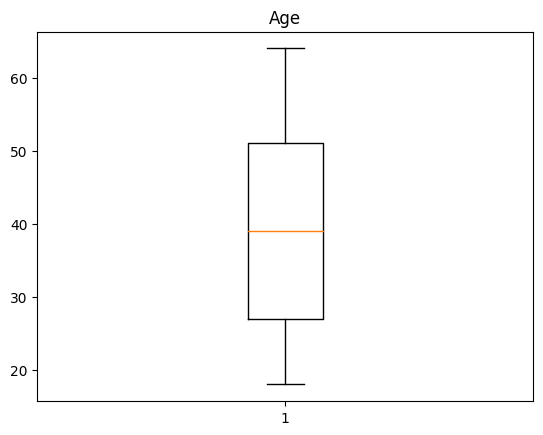

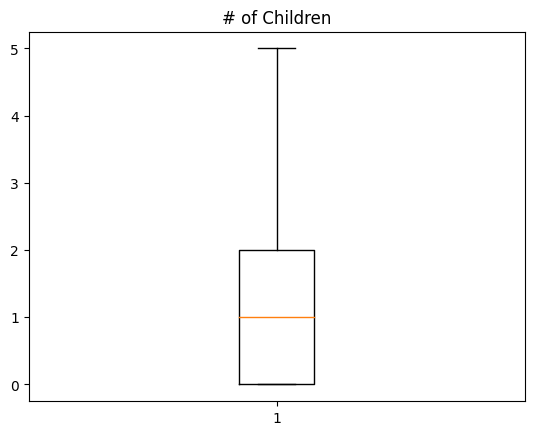

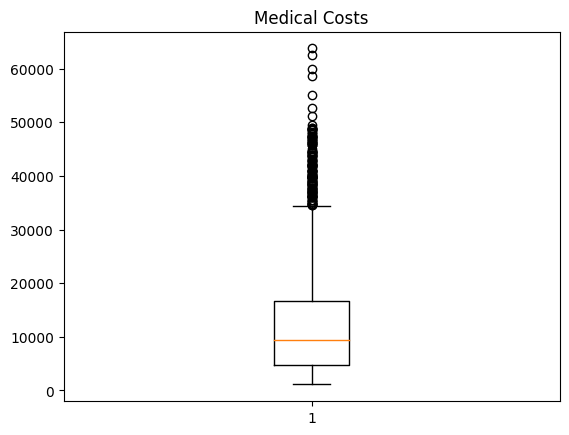

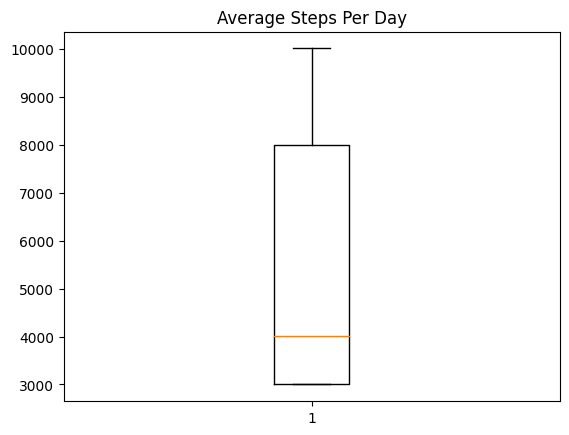

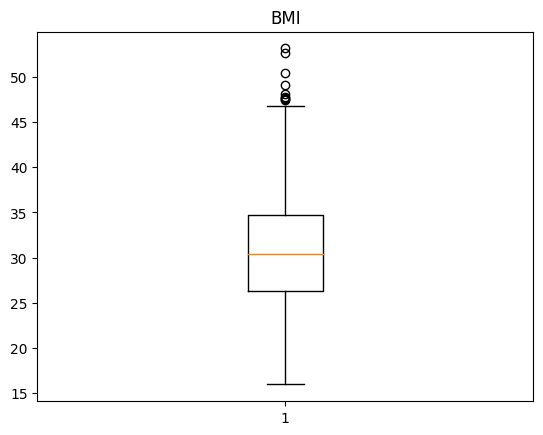

In [7]:
#Boxplots

#Five number summary can be found in df.describe() above 

plt.boxplot(df.age)
plt.title('Age')
plt.show()

plt.boxplot(df.children)
plt.title('# of Children')
plt.show()

plt.boxplot(df.charges)
plt.title('Medical Costs')
plt.show()

plt.boxplot(df.steps)
plt.title('Average Steps Per Day')
plt.show()

plt.boxplot(df.bmi)
plt.title('BMI')
plt.show()

Medical Costs and BMI have a large amount of outliers. This is expected because these have the most vared outcomes among the different regressors. Even then, we will not be removing the outliers because there is no reason to remove them. The nature of medical costs being somewhat exponential in this sample resembles real life with those having a large amount of health problems most likely to incur bills of some sort, especially within the higher range. 

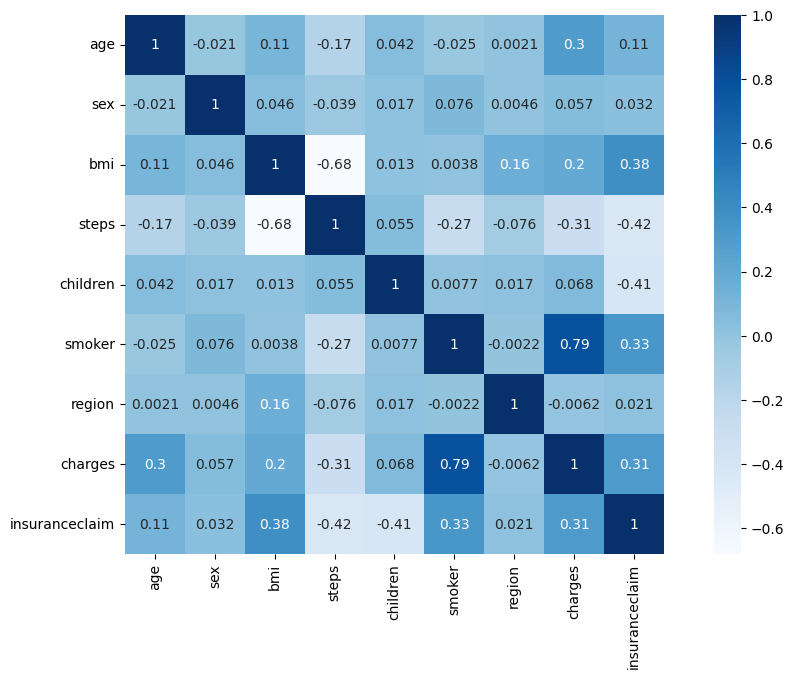

In [8]:
# Correlation Plot
plt.figure(figsize=(13,7))
data = df
c = data.corr()
sns.heatmap(c,cmap = "Blues", annot = True, square = True)
plt.show()

Charges and smoker have a very higher relationship coming in at 0.79. I think we will find that the insurance claim variable will be tied to the smoker trait more than anything as those also hsare a very high affinity ofr eachother. Stops seems to lower the chances of an insurance claim as do kids. Finally bmi also seems to have a somewhat large correlation with insurance claim. These will all be variables to watch for. 

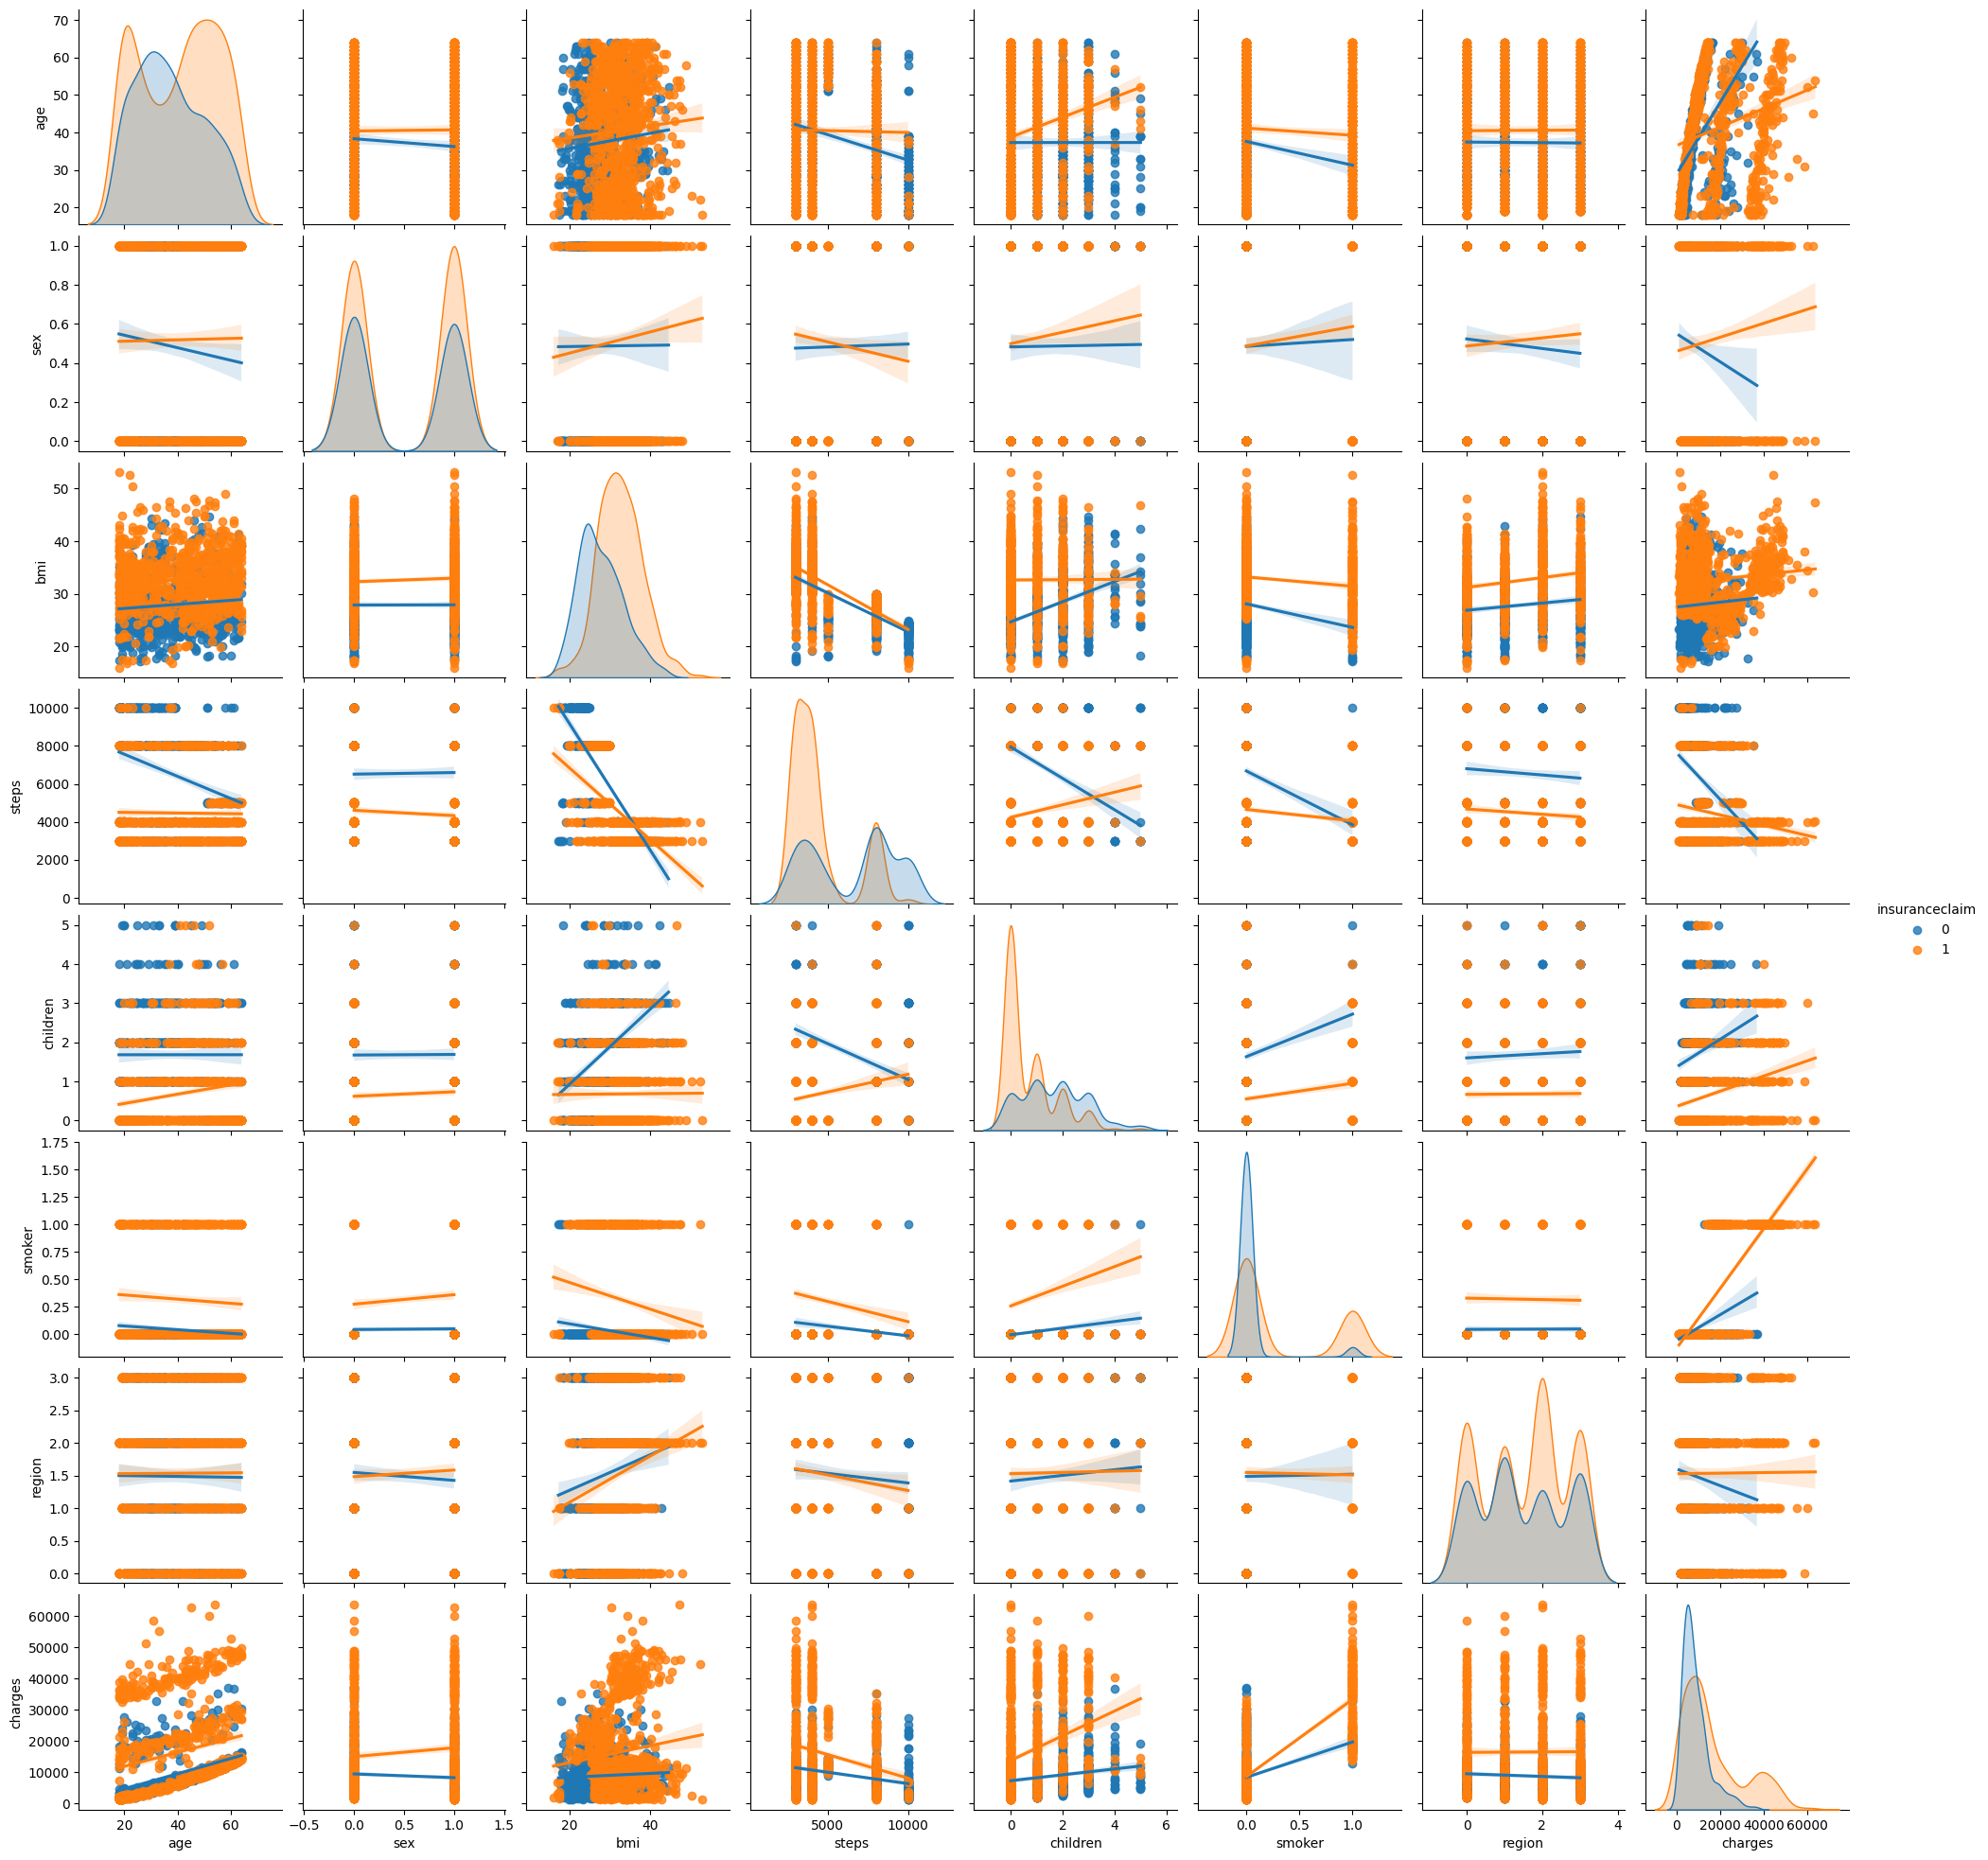

In [9]:
# Pair Plot
sns.pairplot(df, kind = 'reg', hue='insuranceclaim')
plt.show()

In [10]:
# Profile Report
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly co

sumsquare_error         aic         bic  kl_div  ks_statistic  \
beta              0.057285  778.756970  799.552695     inf      0.051735   
rdist             0.058683  783.775454  799.372248     inf      0.088205   
johnsonsb         0.059086  786.729329  807.525054     inf      0.067474   
arcsine           0.060383  801.842295  812.240158     inf      0.135700   
bradford          0.061369  775.925513  791.522307     inf      0.071013   

              ks_pvalue  
beta       1.493079e-03  
rdist      1.657579e-09  
johnsonsb  9.681940e-06  
arcsine    5.969435e-22  
bradford   2.595408e-06

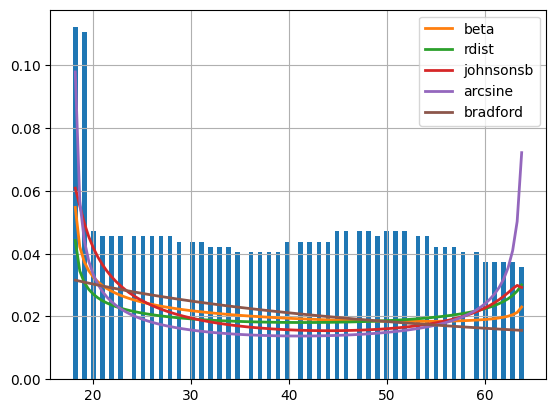

In [11]:
f = Fitter(df.age)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\stats\_continuo

sumsquare_error         aic         bic  kl_div  ks_statistic  \
genhyperbolic        76.597493  527.084391  553.079047     inf      1.000000   
alpha                94.122667  621.065256  636.662050     inf      0.383604   
lomax                98.566723  523.010661  538.607455     inf      0.428999   
halfcauchy          104.017318  526.915725  537.313587     inf      0.428999   
foldcauchy          104.463627  518.840276  534.437070     inf      0.428999   

                   ks_pvalue  
genhyperbolic   0.000000e+00  
alpha          1.308940e-177  
lomax          3.864903e-224  
halfcauchy     3.864903e-224  
foldcauchy     3.864875e-224

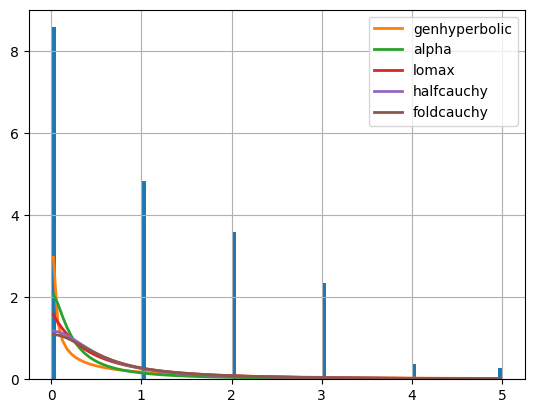

In [12]:
g = Fitter(df.children)
g.fit()
g.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED e

sumsquare_error          aic          bic  kl_div  \
pareto                 4.181004e-09  2402.680564  2418.277357     inf   
expon                  4.181004e-09  2400.680565  2411.078428     inf   
laplace_asymmetric     5.534880e-09  2406.180957  2421.777750     inf   
moyal                  1.062631e-08  2471.833138  2482.231000     inf   
halfnorm               1.095849e-08  2443.897070  2454.294933     inf   

                    ks_statistic     ks_pvalue  
pareto                  0.061014  8.997096e-05  
expon                   0.061014  8.997071e-05  
laplace_asymmetric      0.060496  1.065255e-04  
moyal                   0.073052  1.179007e-06  
halfnorm                0.166563  6.513783e-33

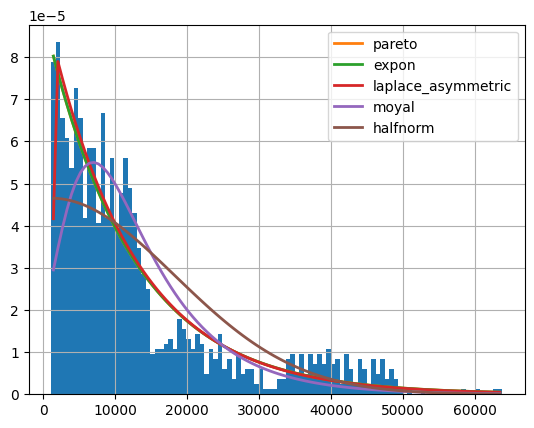

In [13]:
h = Fitter(df.charges)
h.fit()
h.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED exp

sumsquare_error          aic          bic  kl_div  ks_statistic  \
pareto           0.000034  2152.359391  2167.956185     inf      0.383168   
powerlaw         0.000039  1901.653252  1917.250045     inf      0.298833   
expon            0.000048  1855.642741  1866.040603     inf      0.305132   
cauchy           0.000049  1994.952625  2005.350488     inf      0.280329   
laplace          0.000049  1929.029403  1939.427266     inf      0.297788   

              ks_pvalue  
pareto    3.422277e-177  
powerlaw  1.916791e-106  
expon     4.642526e-111  
cauchy     1.735581e-93  
laplace   1.091530e-105

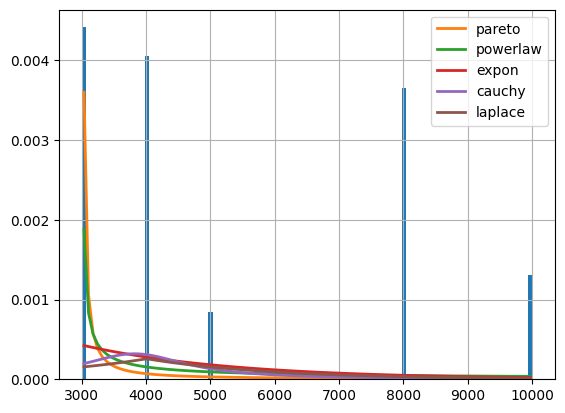

In [14]:
i = Fitter(df.steps)
i.fit()
i.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED 

sumsquare_error         aic         bic  kl_div  ks_statistic  \
gennorm           0.005907  907.748325  923.345118     inf      0.025813   
norm              0.005933  899.658628  910.056490     inf      0.026140   
maxwell           0.006350  857.510907  867.908770     inf      0.037903   
logistic          0.006887  871.715220  882.113083     inf      0.027542   
hypsecant         0.008220  863.792456  874.190319     inf      0.034699   

           ks_pvalue  
gennorm     0.329037  
norm        0.314540  
maxwell     0.041704  
logistic    0.257345  
hypsecant   0.077893

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


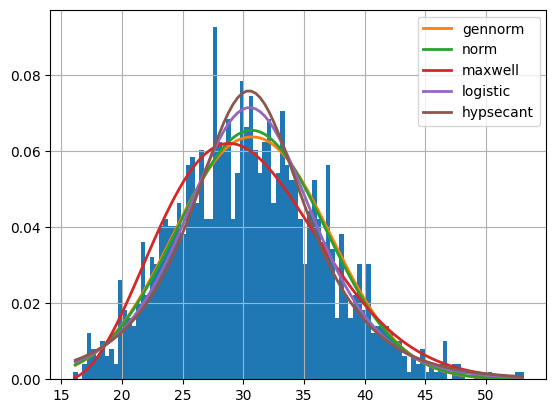

In [15]:
j = Fitter(df.bmi)
j.fit()
j.summary()

### 3. Fit the three models below, and identify which model is your preferred one and why. Make sure to include relevant plots, statistical diagnostics, etc., to support your conclusion, and to comment on your findings.
### • Linear Probability Model

In [11]:
# omitting region variable
ols_lpm = smf.ols('insuranceclaim ~ age + bmi + steps + children + smoker + charges', df).fit()
print(ols_lpm.summary())

                            OLS Regression Results                            
Dep. Variable:         insuranceclaim   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     179.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          4.16e-167
Time:                        16:38:02   Log-Likelihood:                -555.51
No. Observations:                1338   AIC:                             1125.
Df Residuals:                    1331   BIC:                             1161.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2792      0.112     -2.497      0.0

The variables steps and charges are very close to zero, so they seem to have little effect on the probability of an insurance claim being filed. They are both likely to be statiscally insignificant. The variable smoker has a huge effect on the dependent variable (${\beta}_{smoker}=0.5047$). This means that on average, if an individual is a smoker, their probability of filing a health insurance claim increases by 50.47%. The variable children has the opposite effect, although more weakly. There is also strong multicollinearity. It might be tied to a whole host of things, including steps and bmi or insurance claim and smoker and so on. 

### • Probit Model

In [12]:
ols_probit = smf.probit('insuranceclaim ~ age + bmi + steps + children + smoker + charges', df).fit(cov_type='HC3')
print(ols_probit.summary())

Optimization terminated successfully.
         Current function value: 0.383533
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:         insuranceclaim   No. Observations:                 1338
Model:                         Probit   Df Residuals:                     1331
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.4348
Time:                        16:38:02   Log-Likelihood:                -513.17
converged:                       True   LL-Null:                       -907.91
Covariance Type:                  HC3   LLR p-value:                2.879e-167
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6672      0.587     -7.949      0.000      -5.818      -3.516
age            0.0175      0.

Smoker has a very large and outsized effect on the chances of an insurance claim. It is almost a guarantee that any individual who smokes will most likely have an insurance claim. This is because of the nature of age and bmi as well as steps combining to drage the intercept to a less negative value.  

Charges prove to be unimportant to insruance claim. This is most likely because if you are paying high charges you most defintely already have an insurance claim. 

In [13]:
# variable of interest is bmi
probit_pea = ols_probit.params*stats.norm.pdf(ols_probit.params[0] + ols_probit.params[1]*df.bmi.mean())

In [14]:
print('Probit PEA: ', probit_pea)

Probit PEA:  Intercept   -3.652192e-04
age          1.365846e-06
bmi          1.150269e-05
steps        3.692755e-09
children    -5.683596e-05
smoker       1.752940e-04
charges      2.989858e-10
dtype: float64


In [15]:
probit_ape = ols_probit.params*stats.norm.pdf(ols_probit.fittedvalues).mean()
print('Probit PEA: ', probit_ape)

Probit PEA:  Intercept   -1.040272e+00
age          3.890404e-03
bmi          3.276368e-02
steps        1.051825e-05
children    -1.618886e-01
smoker       4.992983e-01
charges      8.516156e-07
dtype: float64


In [16]:
# marginal effects
ols_probit.get_margeff().margeff

array([ 3.89040405e-03,  3.27636809e-02,  1.05182528e-05, -1.61888618e-01,
        4.99298255e-01,  8.51615620e-07])

As we had seen above smoking has a large effect, and this finds itself true in the partial and marginal effects. It's a magnitude or more larger than everything else, including the decrease from children. As such we can expect the marginal effects of the other variables unable to keep up with smoker and if a person is a smoker its overwhelmingly likely they have some form of claim. I think the marginal effect model is most definitely more appropriate in terms of observing the changes in probability considering the magnitued of our variables. 

### • Logit Model

In [17]:
ols_logit = smf.logit('insuranceclaim ~ age + bmi + steps + children + smoker + charges', df).fit(disp=0)
print(ols_logit.summary())

                           Logit Regression Results                           
Dep. Variable:         insuranceclaim   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1331
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.4513
Time:                        16:38:02   Log-Likelihood:                -498.16
converged:                       True   LL-Null:                       -907.91
Covariance Type:            nonrobust   LLR p-value:                9.379e-174
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8190      1.059     -8.330      0.000     -10.894      -6.744
age            0.0291      0.007      3.889      0.000       0.014       0.044
bmi            0.2840      0.026     10.945      0.0

There is a very large outsized effect from the smoker category. Being a smoker increases the chances of having a claim by 7,000+ percent. Again we find both steps and charges to be statistically insignficant. 

Steps is an interesting case of reverse causality. Mainly being that incuring or filing an insurance claim/paying a large amount of fees may cause an individual to start increasing their physical activity. Or maybe because of the injury or ailment that caused them to make a claim in the first place lowered their physical activity.

Children also prevent a claim as well. I have no clue as to why having more children would make you less likely to file a claim. It could be a host of culturual, financial, and other explanations. 

In [18]:
l = ols_logit.predict(df, which = 'linear')

In [19]:
np.exp(l)/(1+np.exp(l))

0       0.986242
1       0.523365
2       0.062298
3       0.380218
4       0.723728
          ...   
1333    0.073780
1334    0.734668
1335    0.917982
1336    0.439293
1337    0.998159
Length: 1338, dtype: float64

Here are the predicted values for the logit function. anythong above 0.5 can be counted as 1, as they are more likely to a file an a claim. 

In [20]:
ols_logit.params[0] + ols_logit.params[1]*(31)

-7.916559731868685

In [21]:
p = ols_logit.params[0] + ols_logit.params[1]*(31)+ols_logit.params[5]*(1)
p

-3.645723606315684

Above are the values for changes in age and the likelihood of filing a claim. As we can see it doesn't really have that much of an effect. Smoking does seem to have a very large effect though, and as a result when other metrics are included its not hard to see as to why more than half the individuals within the sample are projected to have a claim of some sort.  

In [22]:
beta_j = ols_logit.params[1]
linear = ols_logit.fittedvalues[0]
partial = ols_logit.params[1]*stats.logistic.pdf(linear)

# 
print("The approximate change in the probability that someone will file a health insurance claim at " + 
      str(linear), "is " + str(partial))

The approximate change in the probability that someone will file a health insurance claim at 4.272261231176719 is 0.000394992069205972


In [23]:
beta_j = ols_logit.params[1]
linear = ols_logit.fittedvalues[2]
partial = ols_logit.params[1]*stats.logistic.pdf(linear)

# 
print("The approximate change in the probability that someone will file a health insurance claim at " + 
      str(linear), "is " + str(partial))

The approximate change in the probability that someone will file a health insurance claim at -2.7115100063338904 is 0.0017005027692525347


In [24]:
# variable of interest is bmi
logit_pea = ols_logit.params*stats.logistic.pdf(ols_logit.params[0] + ols_logit.params[1]*df.bmi.mean())

print("Logistic APE: ", logit_pea)

Logistic APE:  Intercept   -3.182222e-03
age          1.050398e-05
bmi          1.024797e-04
steps        2.808222e-08
children    -5.223464e-04
smoker       1.541082e-03
charges      2.338018e-09
dtype: float64


In [25]:
logit_ape = ols_logit.params*stats.logistic.pdf(ols_logit.fittedvalues).mean()

print("Logit PEA: ", logit_ape)

Logit PEA:  Intercept   -1.059123e+00
age          3.495985e-03
bmi          3.410780e-02
steps        9.346461e-06
children    -1.738499e-01
smoker       5.129103e-01
charges      7.781505e-07
dtype: float64


In [26]:
# marginal effects logit
ols_logit.get_margeff().margeff

array([ 3.49598549e-03,  3.41077977e-02,  9.34646141e-06, -1.73849870e-01,
        5.12910302e-01,  7.78150484e-07])

For Logit again we see that being a smoker results in a much higher chance of filing a claim, and that it makes it much more likely to have a claim overall than something like kids (which reduces chances for every single increase) and bmi. PEA also confirms this same conculstion within logit, as it is a magnitude larger tahn almost every other metric. Of course one can say that the other metrics are magnitudes larger, especially the statistically insignificant steps and charges, but those don't really matter within this fraemwork as they are still not large enough to overcome the changes that smoker manages to accomplish. 

### 4. Using your preferred model, make 4 different predictions, and comment on their reliability.

Logit will be our preferred model moving forward. This is because higher psuedo r-squared and a better fit as indicated by the the log-likelihood functions. 

[[442 113]
 [ 79 704]]
Accuracy = 0.8565022421524664


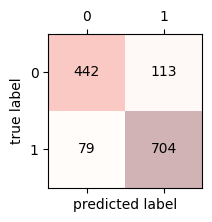

              precision    recall  f1-score   support

           0      0.848     0.796     0.822       555
           1      0.862     0.899     0.880       783

    accuracy                          0.857      1338
   macro avg      0.855     0.848     0.851      1338
weighted avg      0.856     0.857     0.856      1338

Accuracy = 0.8565022421524664
Specificity =  0.7963963963963964
Sensitivity =  0.8991060025542784


In [27]:
X_cols = ['age','bmi','steps', 'children','smoker', 'charges'] 
lr = LogisticRegression()
logit_mod = lr.fit(df[X_cols], df['insuranceclaim'])
conf_mat = confusion_matrix(df['insuranceclaim'], lr.predict(df[X_cols]))
print(conf_mat) 
print('Accuracy =', lr.score(df[X_cols],df['insuranceclaim']))

# Confusion matrix plot Raschka (2014)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# We can print other metrics
print(classification_report(df['insuranceclaim'], lr.predict(df[X_cols]), digits=3))

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cm1 = confusion_matrix(df['insuranceclaim'], lr.predict(df[X_cols]))
total1=sum(sum(cm1))
Accuracy = (cm1[0,0]+cm1[1,1])/total1
Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Accuracy =', Accuracy)
print('Specificity = ', Specificity)
print('Sensitivity = ', Sensitivity)

OUr model is actually very accurate when considering the TP and TN scores, as well as Specificity and Sensitivity scores. With an overall accurancy of around 86%, the model is good but not perfect. 

We have 442 True Negatives 
79 False Negatives 
113 False Positvies 
704 True Positives. 

Sensitivity is TP/(TP+FN). We have a 90% hit rate on the individual actually getting a an insurance calim when the model predicts as such. 

Specificity is TN/(TN+FP). This only has an 80% hit rate on negatives actually being classed as negatives. The reason for that may be related to individual health outside of something like smoking. 

In [28]:
# Predictions for Random people in the sample 
X_new = pd.DataFrame(
    {'age': [27, 39, 51, 60], 'bmi': [26.3, 30.4, 34.7, 53.13],
     'steps': [8004, 10010, 4007, 3008], 'children': [1, 3, 4, 2],
     'smoker': [1, 0, 1, 0], 'charges': [3003, 4740, 9382, 16000]})

predictions_logit = ols_logit.predict(X_new)

print(f'predictions_logit: \n{predictions_logit}\n')

predictions_logit: 
0    0.947942
1    0.070242
2    0.797977
3    0.995762
dtype: float64



Even very healthy individuals related to the rest of the sample with low charges are still hit very hard by smoking when indluding it in the sample.  

In [29]:
# Predictions for random people in the sample (Now #2 index is not a smoker)
X_new = pd.DataFrame(
    {'age': [27, 39, 51, 60], 'bmi': [26.3, 30.4, 34.7, 53.13],
     'steps': [8004, 10010, 4007, 3008], 'children': [1, 3, 4, 2],
     'smoker': [1, 0, 0, 0], 'charges': [3003, 4740, 9382, 16000]})

predictions_logit = ols_logit.predict(X_new)

print(f'predictions_logit: \n{predictions_logit}\n')

predictions_logit: 
0    0.947942
1    0.070242
2    0.052295
3    0.995762
dtype: float64



This batch of predictions in which I remove smoking from a couple of the fake individuals confirms what I had expected above. Smoking most definitely results in an insurance claim within this sample, and as such the false positive and negatives are affected heavily by those who are smokers versues those who arent. 

In [30]:
print(ols_logit.fittedvalues.min())
print(ols_logit.fittedvalues.max())

-7.730302105731752
11.213728604118298


Extreme individuals at both ends of the health spectrum in terms of filing a claim. The individual on the right side probably has high bmi and is a smoker among other things. 

In [31]:
pre=ols_logit.predict()
Preds=pd.DataFrame(pre, columns=['Logit Predictions'])
print(Preds.describe())

       Logit Predictions
count        1338.000000
mean            0.585202
std             0.350338
min             0.000439
25%             0.261386
50%             0.653472
75%             0.936320
max             0.999987


On average we have a an individual more likely to make a claim thatn not, but not by much considering the standard deviation of 0.35. 

In [32]:
df['Predictions']=pre
df.head()

age  sex     bmi  steps  children  smoker  region      charges  \
0   19    0  27.900   3009         0       1       3  16884.92400   
1   18    1  33.770   3008         1       0       2   1725.55230   
2   28    1  33.000   3009         3       0       2   4449.46200   
3   33    1  22.705  10009         0       0       1  21984.47061   
4   32    1  28.880   8010         0       0       1   3866.85520   

   insuranceclaim  Predictions  
0               1     0.986242  
1               1     0.523365  
2               0     0.062298  
3               0     0.380218  
4               1     0.723728

In [33]:
binomial=np.where(pre >.5,1,0)
df['Binomial Predictions']=binomial
df.head()

age  sex     bmi  steps  children  smoker  region      charges  \
0   19    0  27.900   3009         0       1       3  16884.92400   
1   18    1  33.770   3008         1       0       2   1725.55230   
2   28    1  33.000   3009         3       0       2   4449.46200   
3   33    1  22.705  10009         0       0       1  21984.47061   
4   32    1  28.880   8010         0       0       1   3866.85520   

   insuranceclaim  Predictions  Binomial Predictions  
0               1     0.986242                     1  
1               1     0.523365                     1  
2               0     0.062298                     0  
3               0     0.380218                     0  
4               1     0.723728                     1

In [34]:
df.describe()

age          sex          bmi         steps     children  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397   5328.623318     1.094918   
std      14.049960     0.500160     6.098187   2453.643236     1.205493   
min      18.000000     0.000000    15.960000   3000.000000     0.000000   
25%      27.000000     0.000000    26.296250   3008.000000     0.000000   
50%      39.000000     1.000000    30.400000   4007.000000     1.000000   
75%      51.000000     1.000000    34.693750   8004.000000     2.000000   
max      64.000000     1.000000    53.130000  10010.000000     5.000000   

            smoker       region       charges  insuranceclaim  Predictions  \
count  1338.000000  1338.000000   1338.000000     1338.000000  1338.000000   
mean      0.204783     1.515695  13270.422265        0.585202     0.585202   
std       0.403694     1.104885  12110.011237        0.492871     0.350338   
min       0.000000     0.000000   1121.873900        0.000000     0.000439   
25%       0.000000     1.000000   4740.287150        0.000000     0.261386   
50%       0.000000     2.000000   9382.033000        1.000000     0.653472   
75%       0.000000     2.000000  16639.912515        1.000000     0.936320   
max       1.000000     3.000000  63770.428010        1.000000     0.999987   

       Binomial Predictions  
count           1338.000000  
mean               0.597907  
std                0.490504  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

Here are the predictions put into two different forms. First is the logit predictions as given by Predictions, and the Binomial Predictions which sorts the chance of insruance claim into 1 and 0. As we can see it generally should be pretty accurate, but there are some innacuracies as seen by the confusion matrix. 